# 1. Load Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from math import sqrt
import pickle

# 2. Environment setup, parameter, initialize and pre-results

In [2]:
#maze environment
from evaluation import *
from maze import *
env=Maze()


#parameter
num_state=112
num_action=4
slip=0.1
discount=0.9
exploration_factor=0.5
iters=5000
alpha=0.2

#initialize
numVisits = np.zeros((num_state,))
curr_state=env.reset()

#pre-results loading
f = open('store.pckl', 'rb')
Q_VI=pickle.load(f)
f.close()
optQ=np.array(Q_VI)

# 3. Q learning

In [3]:
env = Maze()
actionlist=[0,1,2,3]
eval_steps, eval_reward, RMSE,Q = [], [], [],[]
for i in range(num_state):
    Q.append([0]*num_action)

# Q-learning
for i in range(iters):
    state = env.reset()
    done = False
    while not done:
        if np.random.random() < exploration_factor: #action selection:epsilon greedy algo
            a= np.random.choice(actionlist)
        else: 
            a=Q[state].index(max(Q[state]))

        reward, next_state, done = env.step(state, a)
        Q[state][a] = (1-alpha)*Q[state][a] + alpha*(reward+(discount*max(Q[next_state])))
        state = next_state

    avg_step, avg_reward = evaluation(env, np.array(Q))
    eval_steps.append(avg_step)
    eval_reward.append(avg_reward)
    RMSE.append(np.sqrt(np.mean((np.array(Q)-Q_VI)**2)))


# 4. Show results

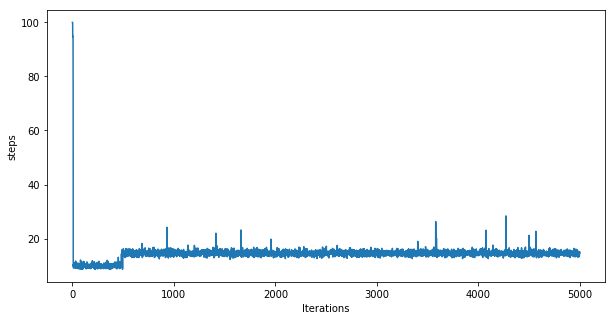

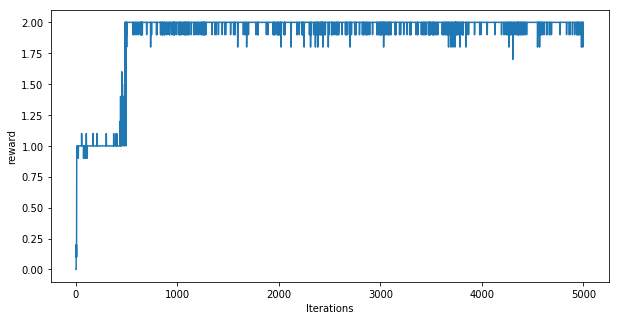

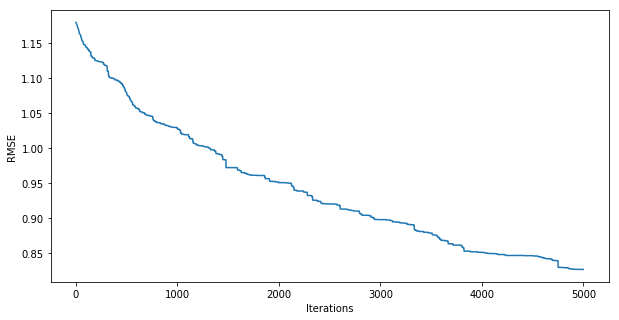

In [7]:
fig1 = plt.figure(figsize=(10,5))
plt.plot(np.arange(iters), eval_steps)
plt.xlabel("Iterations")
plt.ylabel("steps")
plt.show(fig1)
    

fig2 = plt.figure(figsize=(10,5))
plt.plot(np.arange(iters), eval_reward)
plt.xlabel("Iterations")
plt.ylabel("reward")
plt.show(fig2)

fig3 = plt.figure(figsize=(10,5))
plt.plot(np.arange(iters), RMSE)
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.show(fig3)
 
